In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from env import host, user, password

In [3]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [53]:
df_employees = pd.read_sql('select * from employees limit 5 offset 50', url)

## 1.
Load the `mpg` dataset.

> Read the documentation for it, and use the data to answer these questions:

In [5]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [6]:
df_mpg = data('mpg')
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


On average, which `manufacturer` has the best miles per gallon?

In [7]:
df_mpg = df_mpg.assign(avg_mpg = df_mpg[['cty', 'hwy']].mean(axis=1))

In [8]:
manufacturer = df_mpg.groupby(by='manufacturer')

In [9]:
manufacturer_avg_mpg = df_mpg[['manufacturer', 'avg_mpg']].groupby(
    by='manufacturer').mean()

manufac_best_mpg = manufacturer_avg_mpg.nlargest(1, columns='avg_mpg')
manufac_best_mpg

,avg_mpg
manufacturer,
honda,28.5


How many different `manufacturer`s are there?

In [10]:
num_of_manufacturers = df_mpg.manufacturer.nunique()
num_of_manufacturers

15

How many different `models` are there?

In [11]:
num_of_models = df_mpg.model.nunique()
num_of_models

38

Do `automatic` or `manual` cars have better miles per gallon?

In [12]:
df_mpg['trans'] = df_mpg['trans'].str.replace('\(.*\)', '')

In [13]:
df_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize,22.0


In [14]:
trans_avg_mpg = df_mpg[['trans', 'avg_mpg']].groupby(by='trans').mean()
trans_avg_mpg

,avg_mpg
trans,
auto,19.130573
manual,22.227273


## 2.
Joining and Merging

> Copy the `users` and `roles` dataframes from the examples above.

In [24]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

> What do you think a right join would look like? 

In [25]:
pd.merge(users, roles, how='right')

,id,name,role_id
0,1,admin,NaN
1,2,author,NaN
2,3,reviewer,NaN
3,4,commenter,NaN


> An outer join?

In [26]:
pd.merge(users, roles, how='outer')

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN
6,1,admin,NaN
7,2,author,NaN
8,3,reviewer,NaN
9,4,commenter,NaN


> What happens if you drop the foreign keys from the dataframes and try to merge them?

In [27]:
del users['id'], roles['id']

In [28]:
pd.merge(users, roles)

,name,role_id


## 3.
Getting data from SQL databases

Create a function named `get_db_url`. It should accept a `username`, `hostname`, `password`, and `database` name and return a `url` formatted like in the examples in this lesson.

In [74]:
def get_db_url(username, hostname, pswd, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

Use your function to obtain a connection to the employees database.

In [75]:
df_employees = pd.read_sql('select * from employees;',
                          get_db_url(host, user, password, database='employees'))

Once you have successfully run a query:
> Intentionally make a typo in the database `url`. What kind of error message do you see?

In [73]:
df_employees_url_error = pd.read_sql('select * from employees;',
                                     get_db_url(host, user, password, database='employees'))

NoSuchModuleError: Can't load plugin: sqlalchemy.dialects:mysql.py1mysql

Intentionally make an error in your SQL query. What does the error message look like?

In [76]:
df_sql_query_error = pd.read_sql("Sselect * from employees;",
                                get_db_url(host, user, password, database='employees'))

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'Sselect * from employees' at line 1")
[SQL: Sselect * from employees;]
(Background on this error at: http://sqlalche.me/e/f405)

Read the employees and titles tables into two separate dataframes

In [78]:
df_employees = pd.read_sql_table('employees',
                           get_db_url(host, user, password, database='employees'))

df_titles = pd.read_sql_table('titles',
                           get_db_url(host, user, password, database='employees'))

In [88]:
df_employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [90]:
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   emp_no      300024 non-null  int64         
 1   birth_date  300024 non-null  datetime64[ns]
 2   first_name  300024 non-null  object        
 3   last_name   300024 non-null  object        
 4   gender      300024 non-null  object        
 5   hire_date   300024 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 13.7+ MB


In [89]:
df_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


Visualize the number of employees with each title.

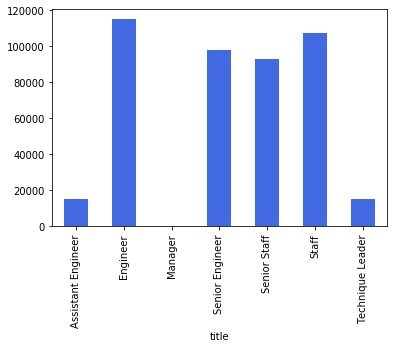

In [191]:
emps_per_titles = df_titles.groupby(by='title').emp_no.count()
emps_per_titles.plot.bar(color='Royalblue');

In [ ]:
df_current_emp_titles = df_emp_titles[df_emp_titles.to_date.isin(['NaT'])]
num_cur_emp_titles = df_current_emp_titles.title.value_counts(normalize=True)

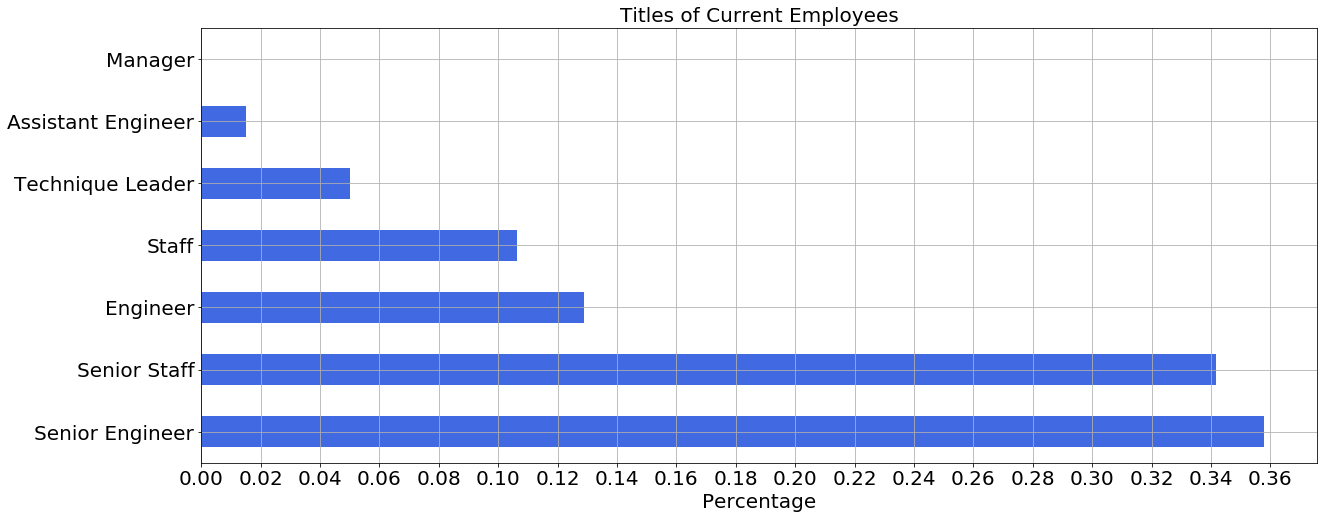

In [195]:
plt.figure(figsize=(20, 8))
num_cur_emp_titles.plot.barh(color='Royalblue')
plt.title('Titles of Current Employees', fontsize=20) # rename?
plt.xlabel('Percentage', fontsize=20)
plt.xticks(np.arange(0, .38, .02))
plt.grid(1000)
plt.tick_params(labelsize=20);

Join the employees and titles dataframes together.

In [ ]:
df_emp_titles = pd.merge(df_employees, df_titles)
df_emp_titles

Visualize how frequently employees change titles.

In [209]:
df_current_emp_titles['to_date'] - df_current_emp_titles['from_date']

0        NaT
1        NaT
2        NaT
4        NaT
5        NaT
          ..
443300   NaT
443302   NaT
443304   NaT
443305   NaT
443307   NaT
Length: 240124, dtype: timedelta64[ns]

In [208]:
df_emp_titles.groupby(by='emp_no').title.count()

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 300024, dtype: int64

For each title, find the hire date of the employee that was hired most recently with that title.

Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

## 4.
Use your `get_db_url` function to help you explore the data from the `chipotle` database. Use the data to answer the following questions:

What is the total price for each order?

What are the most popular 3 items?

Which item has produced the most revenue?